# Generate a set of data

We start by creating randomly generating a set of 4 + 4 points by applying a random transformation that stretch and sqeezes a square


In [50]:
import numpy as np

# Transform a (x,y) vector to a deformed version

Applies a non linear transformation to a vector

In [51]:
def transform(x: np.ndarray, epsilon: np.ndarray) -> np.ndarray:
    x_ = x[0]
    y_ = x[1]
    ex = epsilon[0]
    ey = epsilon[1]
    return np.array((x_ * (ex * y_ + 1), y_ * (ey * x_ + 1)))

## Some test

In [52]:
e_1 = np.array((0.1, -0.1))

transform(np.array((1, 1)), e_1)

array([1.1, 0.9])

## Generate some random data

Let's generate a serial of random deformed squares. The output of this function should have shape (4, num_squares).

In [53]:
unit_square = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1]])
print(unit_square.shape)
print([x.shape for x in unit_square])


def deformed_unit_square(epsilon: np.ndarray) -> np.ndarray:
    return np.array([transform(x, epsilon) for x in unit_square]).reshape(4, 2)


(4, 2)
[(2,), (2,), (2,), (2,)]


In [54]:
x = deformed_unit_square(np.array([0.1, -0.1]))
print(f"Result {x}\nShape: {x.shape}")

Result [[ 1.1  0.9]
 [ 0.9 -0.9]
 [-0.9 -1.1]
 [-1.1  1.1]]
Shape: (4, 2)


In [55]:
def generate_random_squares(num_squares: int) -> np.ndarray:
    epsilons = np.random.rand(num_squares, 2).reshape((-1, 2))
    epsilons = epsilons * 0.2 - 0.1
    print(epsilons.shape)

    return np.array([deformed_unit_square(e) for e in epsilons])

### Prepare bones squares

Bones are stretched on Y direction by 2.

In [56]:
NUM_SAMPLES = 1000

In [57]:
bone_data = generate_random_squares(NUM_SAMPLES) * [1, 2]
bone_data.reshape(100, -1)

(1000, 2)


array([[ 1.08289144,  2.03238793,  0.91710856, ..., -2.1859119 ,
        -1.03689935,  2.1859119 ],
       [ 1.02040286,  1.89293346,  0.97959714, ..., -1.95786118,
        -0.99834662,  1.95786118],
       [ 0.92393384,  2.1390153 ,  1.07606616, ..., -2.14773077,
        -1.03772177,  2.14773077],
       ...,
       [ 1.0405393 ,  1.86063595,  0.9594607 , ..., -1.81618349,
        -0.91245983,  1.81618349],
       [ 1.07068293,  2.1083119 ,  0.92931707, ..., -2.09273151,
        -1.05195121,  2.09273151],
       [ 1.05516658,  2.18810886,  0.94483342, ..., -1.83324473,
        -1.09460941,  1.83324473]])

### Prepare teeth

Teeth are rotate by a random angle and translated by 2 units on Y direction

In [58]:
tooth_data = generate_random_squares(NUM_SAMPLES) + [0, 3]
tooth_data.reshape(100, -1)

(1000, 2)


array([[ 1.00334097,  3.94545008,  0.99665903, ...,  2.08255978,
        -1.02025138,  3.91744022],
       [ 0.99617092,  4.05978389,  1.00382908, ...,  2.03029567,
        -0.99534107,  3.96970433],
       [ 0.92813007,  3.90768926,  1.07186993, ...,  2.05694138,
        -1.08897859,  3.94305862],
       ...,
       [ 0.97848781,  3.90600439,  1.02151219, ...,  2.04944067,
        -1.09418955,  3.95055933],
       [ 0.93043044,  3.9480094 ,  1.06956956, ...,  2.09364664,
        -1.02919638,  3.90635336],
       [ 0.93731121,  4.0309314 ,  1.06268879, ...,  2.09767205,
        -0.99793437,  3.90232795]])

### Find weighted center of mass

In [59]:
from typing import Callable, Tuple


def find_mass_center(square: np.ndarray,
                     weights: Callable[[np.ndarray], Tuple[float, float]]) -> np.ndarray:
    w = np.array([weights(p) for p in square])
    #print(f"w:{w}")
    s = np.sum(w, axis=0)
    #print(f"s:{s}")
    t = w * square
    #print(f"t:{t}")
    return (np.sum(t, axis=0) / s).reshape(1, -1)

In [60]:
def uniform(_p: np.ndarray) -> Tuple[float, float]:
    return 1., 1.


find_mass_center(unit_square, uniform)

array([[0., 0.]])

In [61]:
def threshold(t=0.):
    def weight(p: np.ndarray) -> Tuple[float, float]:
        return (1, 2) if (p[1] <= t) else (1, 1)

    return weight


find_mass_center(unit_square, threshold())

array([[ 0.        , -0.33333333]])

In [62]:
bone_centers = np.array([find_mass_center(s, threshold()) for s in bone_data]).reshape(-1, 2)

In [63]:
bone_centers

array([[ 0.        , -0.66666667],
       [ 0.        , -0.66666667],
       [ 0.        , -0.66666667],
       ...,
       [ 0.        , -0.66666667],
       [ 0.        , -0.66666667],
       [ 0.        , -0.66666667]])

In [64]:
teeth_centers = np.array([find_mass_center(s, uniform) for s in tooth_data]).reshape(-1, 2)

In [65]:
teeth_centers

array([[0.00000000e+00, 3.00000000e+00],
       [0.00000000e+00, 3.00000000e+00],
       [2.77555756e-17, 3.00000000e+00],
       ...,
       [5.55111512e-17, 3.00000000e+00],
       [0.00000000e+00, 3.00000000e+00],
       [0.00000000e+00, 3.00000000e+00]])

In [66]:
bone_data.reshape(NUM_SAMPLES, -1)

array([[ 1.08289144,  2.03238793,  0.91710856, ..., -1.96761207,
        -1.08289144,  1.96761207],
       [ 0.91214074,  2.09242418,  1.08785926, ..., -1.90757582,
        -0.91214074,  1.90757582],
       [ 1.00825527,  1.81941166,  0.99174473, ..., -2.18058834,
        -1.00825527,  2.18058834],
       ...,
       [ 1.06486926,  1.93982599,  0.93513074, ..., -2.06017401,
        -1.06486926,  2.06017401],
       [ 0.90590911,  2.07995154,  1.09409089, ..., -1.92004846,
        -0.90590911,  1.92004846],
       [ 1.09460941,  2.16675527,  0.90539059, ..., -1.83324473,
        -1.09460941,  1.83324473]])

In [67]:
tooth_data.reshape(NUM_SAMPLES, -1)

array([[ 1.00334097,  3.94545008,  0.99665903, ...,  1.94545008,
        -1.00334097,  4.05454992],
       [ 1.09627975,  3.96966869,  0.90372025, ...,  1.96966869,
        -1.09627975,  4.03033131],
       [ 0.90913723,  3.90169345,  1.09086277, ...,  1.90169345,
        -0.90913723,  4.09830655],
       ...,
       [ 1.0809674 ,  3.92323478,  0.9190326 , ...,  1.92323478,
        -1.0809674 ,  4.07676522],
       [ 1.02733723,  3.98117614,  0.97266277, ...,  1.98117614,
        -1.02733723,  4.01882386],
       [ 0.99793437,  4.09767205,  1.00206563, ...,  2.09767205,
        -0.99793437,  3.90232795]])

In [68]:

input_set = np.append(bone_data.reshape(NUM_SAMPLES, -1), tooth_data.reshape(NUM_SAMPLES, -1),
                      axis=1)

In [69]:
input_set

array([[ 1.08289144,  2.03238793,  0.91710856, ...,  1.94545008,
        -1.00334097,  4.05454992],
       [ 0.91214074,  2.09242418,  1.08785926, ...,  1.96966869,
        -1.09627975,  4.03033131],
       [ 1.00825527,  1.81941166,  0.99174473, ...,  1.90169345,
        -0.90913723,  4.09830655],
       ...,
       [ 1.06486926,  1.93982599,  0.93513074, ...,  1.92323478,
        -1.0809674 ,  4.07676522],
       [ 0.90590911,  2.07995154,  1.09409089, ...,  1.98117614,
        -1.02733723,  4.01882386],
       [ 1.09460941,  2.16675527,  0.90539059, ...,  2.09767205,
        -0.99793437,  3.90232795]])

In [70]:
output_set = np.append(bone_centers, teeth_centers, axis=1)

In [71]:
output_set

array([[ 0.00000000e+00, -6.66666667e-01,  0.00000000e+00,
         3.00000000e+00],
       [ 0.00000000e+00, -6.66666667e-01,  0.00000000e+00,
         3.00000000e+00],
       [ 0.00000000e+00, -6.66666667e-01,  2.77555756e-17,
         3.00000000e+00],
       ...,
       [ 0.00000000e+00, -6.66666667e-01,  5.55111512e-17,
         3.00000000e+00],
       [ 0.00000000e+00, -6.66666667e-01,  0.00000000e+00,
         3.00000000e+00],
       [ 0.00000000e+00, -6.66666667e-01,  0.00000000e+00,
         3.00000000e+00]])

## Let's add some more random-ness

Will translate input and outputs each by a random vector

In [72]:
vectors = np.random.random((NUM_SAMPLES, 2)) * 2 + [-1, -1]
input_vec = np.stack(
    [vectors[:, 0], vectors[:, 1], vectors[:, 0], vectors[:, 1], vectors[:, 0], vectors[:, 1],
     vectors[:, 0], vectors[:, 1], vectors[:, 0], vectors[:, 1], vectors[:, 0], vectors[:, 1],
     vectors[:, 0], vectors[:, 1],
     vectors[:, 0], vectors[:, 1]], axis=1)

output_vec = np.stack(
    [vectors[:, 0], vectors[:, 1], vectors[:, 0], vectors[:, 1]], axis=1)

In [79]:
from utils import rotation

thetas = (np.random.random(NUM_SAMPLES) * 2 - 1) * np.pi / 3
rots = np.array([rotation(t) for t in thetas])

input_set_rot = np.matmul(input_set.reshape(NUM_SAMPLES, -1, 2), rots).reshape(NUM_SAMPLES, -1)
output_set_rot = np.matmul(output_set.reshape(NUM_SAMPLES, -1, 2), rots).reshape(NUM_SAMPLES, -1)

In [80]:
input_set_rot.shape

(1000, 16)

In [81]:
import pandas as pd

input_data = pd.DataFrame(input_set_rot + input_vec)
output_data = pd.DataFrame(output_set_rot + output_vec)

In [82]:
from utils import datadir

input_data.to_pickle(datadir("input_rot.pkl"))
output_data.to_pickle(datadir("output_rot.pkl"))

In [83]:
input_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.516425,1.904407,2.830124,-1.441737,1.326225,-2.493799,-1.174322,0.549347,-0.698353,3.384424,0.434217,1.870214,-1.092114,0.583540,-2.366667,2.263976
1,0.190749,2.636898,1.990407,-1.145306,-0.084083,-1.826785,-1.415641,1.752770,-0.374559,4.436448,0.207304,2.576463,-1.432195,1.813204,-2.415939,3.634099
2,0.763316,2.400042,0.899236,-1.236279,-1.067384,-1.680220,-1.266553,2.676438,0.577066,4.476345,0.834169,2.682152,-1.337407,2.394327,-1.247849,4.596625
3,2.721627,0.011318,-0.064539,-3.122918,-1.379603,-1.771914,0.969613,1.228005,3.831253,1.451021,2.677371,0.037996,1.013869,1.201328,2.427678,2.855380
4,1.358551,2.593314,1.815764,-1.247205,0.037793,-1.679343,-0.809907,2.372996,0.934270,4.690807,1.261360,2.574946,-0.712716,2.391365,-1.038083,4.221932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.561810,2.416841,1.728431,-0.158547,0.361340,-1.620670,-2.655468,0.725439,-2.947575,3.593161,-1.616090,2.356256,-2.601187,0.786025,-4.423227,2.009868
996,2.516807,1.616279,0.044194,-1.592231,-1.548466,-0.247470,0.992358,2.778237,3.876662,3.173724,2.444416,1.525986,1.064749,2.868529,2.139221,4.337900
997,-0.266827,2.010331,0.778407,-1.728121,-0.968680,-2.406388,-2.333855,1.483393,-0.849080,3.906419,-0.447146,2.096965,-2.153536,1.396759,-2.956806,3.401421
998,-0.218928,3.232466,1.253863,-0.662542,-0.875507,-1.191209,-1.891129,2.516926,-0.694903,5.077147,-0.136472,3.195135,-1.973586,2.554258,-2.659362,4.473817


In [84]:
output_data

,0,1,2,3
0,1.275800,-0.902886,-0.930729,2.025539
1,0.431293,-0.259086,-1.003847,3.115054
2,-0.139922,-0.126086,-0.293505,3.537362
3,0.133826,-1.425057,2.487543,1.386431
4,0.709293,-0.147797,0.111208,3.469762
...,...,...,...,...
995,-0.006289,-0.069359,-2.897020,2.186327
996,0.083437,0.119185,2.381262,2.976535
997,-0.496871,-0.795882,-1.601642,2.700391
998,-0.225558,0.340315,-1.366081,3.825089


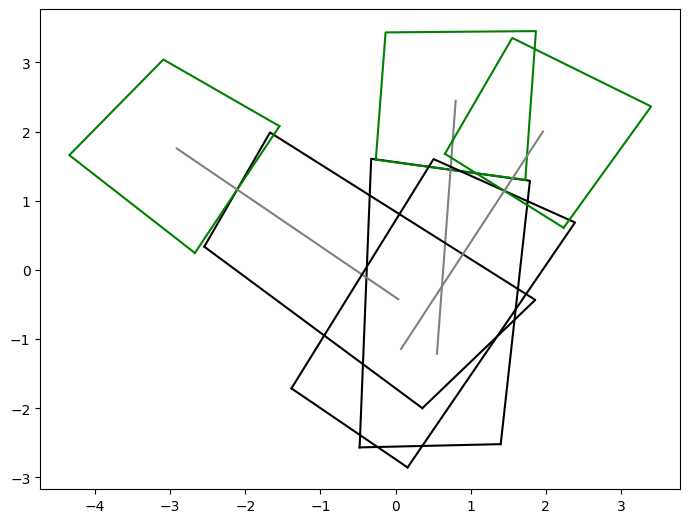

In [99]:
from utils import draw_square, draw_output
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1))


def draw_n(n=13):
    draw_square(ax, input_data.to_numpy()[n][0:8], color="black")
    draw_square(ax, input_data.to_numpy()[n][8:17], color="green")
    draw_output(ax, output_data.to_numpy()[n])


draw_n(13)
draw_n(20)
draw_n(40)